In [1]:
%matplotlib inline
%run 'notebook_utils.py'

import sys
import pprint
import cProfile

import matplotlib.pyplot as plt
import numpy             as np

import radical.utils     as ru
import radical.pilot     as rp
import radical.analytics as ra

from   radical.utils.profile import *
from   radical.pilot.states  import *
import glob


2018-07-15 15:15:49,202: radical.saga        : MainProcess                     : MainThread     : INFO    : python.interpreter   version: 2.7.12 (default, Oct 11 2016, 05:24:00) [GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.38)]
2018-07-15 15:15:49,202: radical.saga        : MainProcess                     : MainThread     : INFO    :                      pid/tid: 56628/MainThread
2018-07-15 15:15:49,202: radical.saga        : MainProcess                     : MainThread     : WARNING : ru.get_logger() is deprecated, use ru.Logger()
2018-07-15 15:15:49,202: radical.saga        : MainProcess                     : MainThread     : INFO    : radical.saga         version: 0.47.3
2018-07-15 15:15:49,207: radical.pilot       : MainProcess                     : MainThread     : INFO    : python.interpreter   version: 2.7.12 (default, Oct 11 2016, 05:24:00) [GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.38)]
2018-07-15 15:15:49,207: radical.pilot       : MainProcess                 

In [49]:
# Load wrangled data saved in .csv files for both synapse, microbenchmarks and gromacs.
sessions = pd.read_csv('../null_continuous_fifo/master/sessions.csv', index_col=0)
pilots = pd.read_csv('../null_continuous_fifo/master/pilots.csv', index_col=0)
units = pd.read_csv('../null_continuous_fifo/master/units.csv', index_col=0)

In [50]:
print 'Synapse: Weak Scaling: Total number of successful runs: %s' % sessions.shape[0]
print 'Synapse: Weak Scaling: Total number of pilots: %s' % pilots.shape[0]
print 'Synapse: Weak Scaling: Total number of units: %s\n' % units.shape[0]

Synapse: Weak Scaling: Total number of successful runs: 1
Synapse: Weak Scaling: Total number of pilots: 1
Synapse: Weak Scaling: Total number of units: 800



## Get timestamps for all units in `cu_exec_start`, `cu_exec_stop`

In [15]:
# Load only the 1 generation strong scaling using heterogeneous protocols (4 ESMACS, 4 TIES)
# rp_folder = glob.glob('../null_continuous_fifo/exp1/rp.*')
# src = rp_folder[0]
# session = ra.Session(stype='radical.pilot', src=src)
# # units = session.filter(etype='unit', uid=units[:3])
# events = session.list('event')

# # Ask Andre about this sorting function

# units  = session.filter(etype=['unit'],
#          state=[rp.DONE]).filter(uid=sorted(session.list('uid'))[:10])


# data=[]
# stop_data = []
# unit_ids = []

# for unit in units.get():
#     print unit.uid
#     unit_ids.append(unit.uid)
#     data.append(unit.timestamps(event=[{ru.EVENT: 'cu_exec_start'}]))
#     stop_data.append(unit.timestamps(event = [{ru.EVENT: 'cu_exec_stop'}]))
# data = pd.DataFrame(data, columns = ['cu_exec_start'])
# data # show all data for 720 units
# stop_data = pd.DataFrame(stop_data, columns = ['cu_exec_stop'])
# data['cu_exec_stop'] = stop_data
# data

In [47]:
rp_folder = glob.glob('../null_continuous_fifo/master/exp1/rp.*')
src = rp_folder[0]
session = ra.Session(stype='radical.pilot', src=src)

events = session.list('event')
# units  = session.filter(etype=['unit'],
#          state=[rp.DONE]).filter(uid=sorted(session.list('uid')))

units = session.filter(etype='unit', uid=['unit.000000','unit.000049',
                                       'unit.000050','unit.000179',
                                       'unit.000180','unit.000229',
                                       'unit.000230','unit.000359',
                                       'unit.000360','unit.000409',
                                       'unit.000410','unit.000539',
                                       'unit.000540','unit.000589',
                                       'unit.000590','unit.000719'], inplace=True)

cu_start_data=[]
cu_stop_data = []
AGENT_SCHEDULING_data = []
FAILED_data = []

units_ids = ['unit.000000','unit.000049',
               'unit.000050','unit.000179',
               'unit.000180','unit.000229',
               'unit.000230','unit.000359',
               'unit.000360','unit.000409',
               'unit.000410','unit.000539',
               'unit.000540','unit.000589',
               'unit.000590','unit.000719']

# events
cu_start_data = units.timestamps(event = [{ru.EVENT: 'cu_exec_start'}])
cu_stop_data = units.timestamps(event = [{ru.EVENT: 'cu_exec_stop'}])
cu_start_data = pd.DataFrame(cu_start_data, columns = ['cu_exec_start'], index = units_ids)
cu_stop_data = pd.DataFrame(cu_stop_data, columns = ['cu_exec_stop'], index = units_ids)

# states

Duplicates_AGENT_SCHEDULING_data = units.timestamps(event = [{ru.STATE: rp.AGENT_SCHEDULING}])
AGENT_SCHEDULING_data = [Duplicates_AGENT_SCHEDULING_data[i] for i in range(len(Duplicates_AGENT_SCHEDULING_data)) if i%2==0]

# FAILED_data = units.timestamps(event = [{ru.STATE: rp.FAILED}])
AGENT_SCHEDULING_data = pd.DataFrame(AGENT_SCHEDULING_data, columns = ['AGENT_SCHEDULING'], index = units_ids)

# FAILED_data = pd.DataFrame(FAILED_data, columns = ['FAILED'], index = units_ids)

df = pd.concat([cu_start_data, cu_stop_data, AGENT_SCHEDULING_data],  axis=1)
df



# for unit in units.get():
#     print unit.uid
#     unit_ids.append(unit.uid)
#     data.append(unit.timestamps(event=[{ru.EVENT: 'cu_exec_start'}]))
#     stop_data.append(unit.timestamps(event = [{ru.EVENT: 'cu_exec_stop'}]))
# data = pd.DataFrame(data, columns = ['cu_exec_start'])
# data # show all data for 720 units
# stop_data = pd.DataFrame(stop_data, columns = ['cu_exec_stop'])
# data['cu_exec_stop'] = stop_data
# data



,cu_exec_start,cu_exec_stop,AGENT_SCHEDULING
unit.000000,633.9110,655.7571,633.6389
unit.000049,639.4033,658.8136,638.8019
unit.000050,655.9859,692.0444,638.9218
unit.000179,673.4938,694.8325,652.8248
unit.000180,673.5834,712.5900,652.8248
unit.000229,705.9465,717.7369,699.2920
unit.000230,706.0313,732.1724,699.3005
unit.000359,803.7521,808.7090,748.0266
unit.000360,803.8200,826.0921,749.0965
unit.000409,812.7506,833.5873,754.5949


### Each subplot presents the data for an EnTK stage (1-4). 


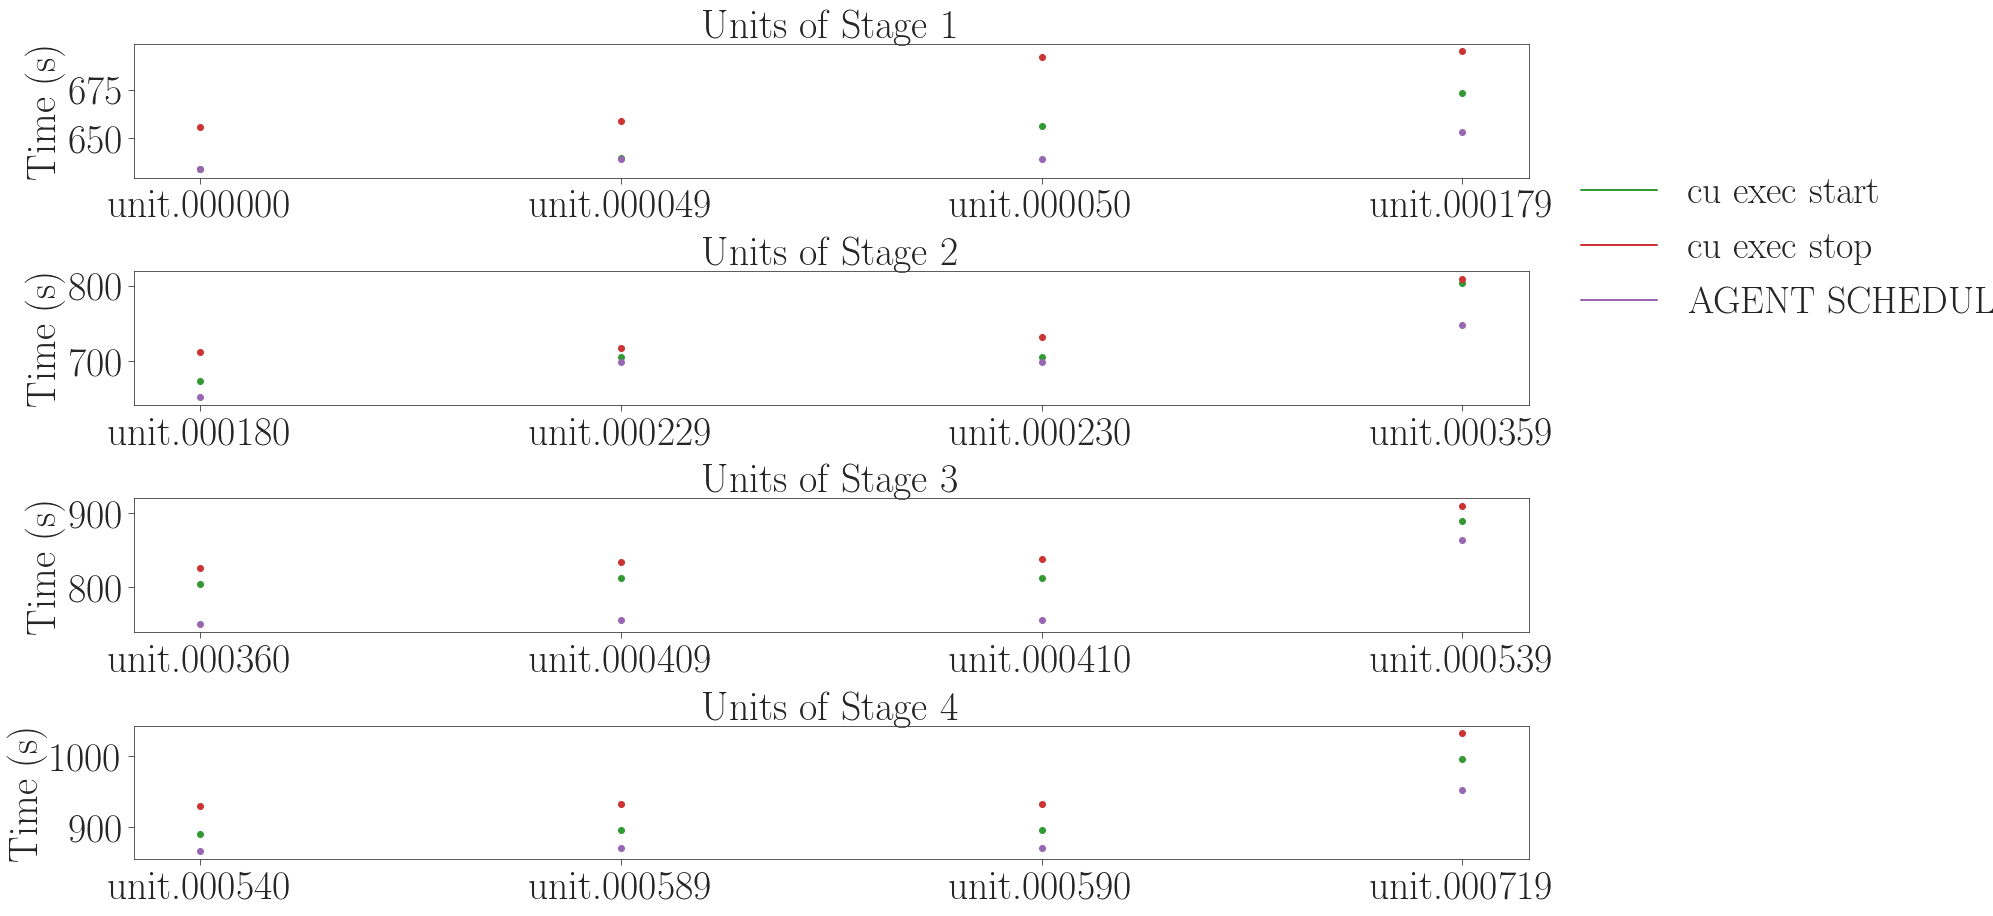

In [132]:
# nunits = concurrent units 
nunits = [1,2,3,4]
fwidth = 32
fhight = 10

fig, axarr = plt.subplots(4, figsize=(25,15))
axarr[0].scatter(df.iloc[0:4]['cu_exec_start'].index, df.iloc[0:4]['cu_exec_start'],  marker='o', color=tableau20[4])
axarr[0].scatter(df.iloc[0:4]['cu_exec_start'].index, df.iloc[0:4]['cu_exec_stop'],  marker='o', color=tableau20[6])
axarr[0].scatter(df.iloc[0:4]['AGENT_SCHEDULING'].index, df.iloc[0:4]['AGENT_SCHEDULING'],  marker='o', color=tableau20[8])
axarr[0].set_ylabel('Time (s)')
axarr[0].set_title('Units of Stage 1')


axarr[1].scatter(df.iloc[4:8]['cu_exec_start'].index, df.iloc[4:8]['cu_exec_start'],  marker='o', color=tableau20[4])
axarr[1].scatter(df.iloc[4:8]['cu_exec_start'].index, df.iloc[4:8]['cu_exec_stop'],  marker='o', color=tableau20[6])
axarr[1].scatter(df.iloc[4:8]['AGENT_SCHEDULING'].index, df.iloc[4:8]['AGENT_SCHEDULING'],  marker='o', color=tableau20[8])
axarr[1].set_title('Units of Stage 2')
axarr[1].set_ylabel('Time (s)')

axarr[2].scatter(df.iloc[8:12]['cu_exec_start'].index, df.iloc[8:12]['cu_exec_start'],  marker='o', color=tableau20[4])
axarr[2].scatter(df.iloc[8:12]['cu_exec_start'].index, df.iloc[8:12]['cu_exec_stop'],  marker='o', color=tableau20[6])
axarr[2].scatter(df.iloc[8:12]['AGENT_SCHEDULING'].index, df.iloc[8:12]['AGENT_SCHEDULING'],  marker='o', color=tableau20[8])
axarr[2].set_title('Units of Stage 3')
axarr[2].set_ylabel('Time (s)')

axarr[3].scatter(df.iloc[12:16]['cu_exec_start'].index, df.iloc[12:16]['cu_exec_start'],  marker='o', color=tableau20[4])
axarr[3].scatter(df.iloc[12:16]['cu_exec_start'].index, df.iloc[12:16]['cu_exec_stop'],  marker='o', color=tableau20[6])
axarr[3].scatter(df.iloc[12:16]['AGENT_SCHEDULING'].index, df.iloc[12:16]['AGENT_SCHEDULING'],  marker='o', color=tableau20[8])
axarr[3].set_title('Units of Stage 4')
axarr[3].set_ylabel('Time (s)')

fig.subplots_adjust(hspace=0.7)

fig.legend((
                mpl.lines.Line2D([], [], color=tableau20[4]),
                mpl.lines.Line2D([], [], color=tableau20[6]),
                mpl.lines.Line2D([], [], color=tableau20[8]) 
           ),
           (
                'cu exec start',
                'cu exec stop',
                'AGENT SCHEDULING'
           ),
            bbox_to_anchor=(.87, .7), loc=2, borderaxespad=0.)

# fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig('bin_echo_heterogeneous_protocols_CUs.pdf', dpi=300, bbox_inches='tight')
#plt.savefig('bin_echo_heterogeneous_protocols_CUs.png', dpi=300, bbox_inches='tight')
